# `dask.delayed`: processes vs threads

Here we use a (quite uneficient) python implementation of the euclidean distance matrix to understand how `dask.delayed` behaves with python code. Remember that before, what we run with `dask.delayed` was Scipy's `cdist` function.

In [1]:
import dask
import numpy as np

In [2]:
def euclidean_distance_matrix(x, y):
    num_samples = x.shape[0]
    dist_matrix = np.empty((num_samples, num_samples))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            diff = xi - yj
            dist_matrix[i][j] = diff.sum()
    return dist_matrix

In [3]:
x = np.random.random([1000, 50])

In [4]:
%%time
edm = euclidean_distance_matrix(x, x)

CPU times: user 2.8 s, sys: 0 ns, total: 2.8 s
Wall time: 2.8 s


In [5]:
graph = [
    dask.delayed(euclidean_distance_matrix)(x, x),  # 1
    dask.delayed(euclidean_distance_matrix)(x, x),  # 2
    dask.delayed(euclidean_distance_matrix)(x, x),  # 3
    dask.delayed(euclidean_distance_matrix)(x, x),  # 4
    dask.delayed(euclidean_distance_matrix)(x, x),  # 5
    dask.delayed(euclidean_distance_matrix)(x, x),  # 6
    dask.delayed(euclidean_distance_matrix)(x, x),  # 7
    dask.delayed(euclidean_distance_matrix)(x, x),  # 8
    dask.delayed(euclidean_distance_matrix)(x, x),  # 9
    dask.delayed(euclidean_distance_matrix)(x, x),  # 10
    dask.delayed(euclidean_distance_matrix)(x, x),  # 11
    dask.delayed(euclidean_distance_matrix)(x, x),  # 12
]

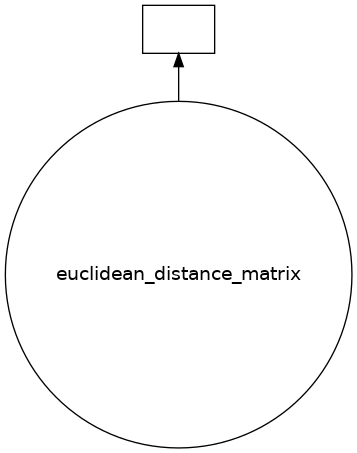

In [8]:
graph[0].visualize()

In [9]:
%%time
edm = dask.compute(graph, scheduler='threads')

CPU times: user 34.1 s, sys: 500 ms, total: 34.6 s
Wall time: 34 s


In [10]:
%%time
edm = dask.compute(graph, scheduler='processes')

CPU times: user 37 ms, sys: 186 ms, total: 223 ms
Wall time: 18.1 s
